<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Ciencia-de-Datos-en-Ciencias-Economicas-con-Python/blob/master/Python_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Utilizando Python en análisis financiero y predictivo de Bitcoin**


## Extracción de datos

### Carga de librerías necesarias para la extracción de los datos

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
BTC2019 = pdr.DataReader("BTC-USD", start='2018-12-31', end='2019-12-29', data_source='yahoo')

Se crea el objeto Bitcoin 2019 para guardar todos los datos de las cotizaciones del bitcoin entre el intervalo de tiempo que inicia el día 31 de diciembre del 2018 hasta el día 29 de diciembre del 2019.

### Creación del dataframe

In [3]:
df = pd.DataFrame(BTC2019)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529
...,...,...,...,...,...,...
2019-12-26,7388.302734,7200.386719,7274.799316,7238.966797,22787010034,7238.966797
2019-12-27,7363.529297,7189.934082,7238.141113,7290.088379,22777360995,7290.088379
2019-12-28,7399.041016,7286.905273,7289.031250,7317.990234,21365673026,7317.990234


In [4]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

## Transformación de datos

In [5]:
df.insert(0,column='Day',value=pd.DatetimeIndex(df.index).day_name())
df.head()

,Day,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2018-12-31,Monday,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
2019-01-01,Tuesday,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2019-01-02,Wednesday,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
2019-01-03,Thursday,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
2019-01-04,Friday,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529


In [6]:
df.insert(1,column='Month',value=pd.DatetimeIndex(df.index).month_name())
df.head()


,Day,Month,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,
2018-12-31,Monday,December,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
2019-01-01,Tuesday,January,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2019-01-02,Wednesday,January,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
2019-01-03,Thursday,January,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
2019-01-04,Friday,January,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529


In [7]:
df.insert(1,column='DayNum',value=[x.weekday() for x in df.index])
df.insert(3,column='MonthNum',value=[x.month for x in df.index])

In [8]:
df.head(7)

,Day,DayNum,Month,MonthNum,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,,,,
2018-12-31,Monday,0,December,12,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
2019-01-01,Tuesday,1,January,1,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2019-01-02,Wednesday,2,January,1,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
2019-01-03,Thursday,3,January,1,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
2019-01-04,Friday,4,January,1,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529
2019-01-05,Saturday,5,January,1,3904.903076,3836.900146,3851.973877,3845.194580,5137609823,3845.194580
2019-01-06,Sunday,6,January,1,4093.297363,3826.513184,3836.519043,4076.632568,5597027439,4076.632568


In [9]:
df.insert(0,column='Date',value=df.index.values)
df.reset_index(drop=True, inplace=True)
df.head()

,Date,Day,DayNum,Month,MonthNum,High,Low,Open,Close,Volume,Adj Close
0,2018-12-31,Monday,0,December,12,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
1,2019-01-01,Tuesday,1,January,1,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2,2019-01-02,Wednesday,2,January,1,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
3,2019-01-03,Thursday,3,January,1,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
4,2019-01-04,Friday,4,January,1,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529


In [10]:
df.rename(columns={'Adj Close':'AdjClose'}, inplace=True)
df.head()

,Date,Day,DayNum,Month,MonthNum,High,Low,Open,Close,Volume,AdjClose
0,2018-12-31,Monday,0,December,12,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439
1,2019-01-01,Tuesday,1,January,1,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020
2,2019-01-02,Wednesday,2,January,1,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424
3,2019-01-03,Thursday,3,January,1,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211
4,2019-01-04,Friday,4,January,1,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529


In [11]:
df.columns

Index(['Date', 'Day', 'DayNum', 'Month', 'MonthNum', 'High', 'Low', 'Open',
       'Close', 'Volume', 'AdjClose'],
      dtype='object')

### Conversión de las cotizaciones diarias del Bitcoin

In [12]:
df['Profitability'] = df.AdjClose.pct_change()
df.head()

,Date,Day,DayNum,Month,MonthNum,High,Low,Open,Close,Volume,AdjClose,Profitability
0,2018-12-31,Monday,0,December,12,3868.742920,3725.867432,3866.839111,3742.700439,4661840806,3742.700439,NaN
1,2019-01-01,Tuesday,1,January,1,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020,0.026938
2,2019-01-02,Wednesday,2,January,1,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424,0.025989
3,2019-01-03,Thursday,3,January,1,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211,-0.027050
4,2019-01-04,Friday,4,January,1,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529,0.005467


Las cotizaciones del Bitcoin generalmente no son estacionarias, y por lo tanto, la media y la varianza cambian con el tiempo. Esto también podría significar observar algunas tendencias o estacionalidad en la serie de cotizaciones.

Por tal motivo al transformar las cotizaciones en rendimientos, se intenta hacer la serie de tiempo estacionaria. Se crea la columna con el cálculo de la rentabilidad simple.

### Limpieza del dataframe, eliminación de valores nulos

In [13]:
df.dropna(how='any', inplace=True)
df

,Date,Day,DayNum,Month,MonthNum,High,Low,Open,Close,Volume,AdjClose,Profitability
1,2019-01-01,Tuesday,1,January,1,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020,0.026938
2,2019-01-02,Wednesday,2,January,1,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424,0.025989
3,2019-01-03,Thursday,3,January,1,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211,-0.027050
4,2019-01-04,Friday,4,January,1,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529,0.005467
5,2019-01-05,Saturday,5,January,1,3904.903076,3836.900146,3851.973877,3845.194580,5137609823,3845.194580,-0.003246
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-26,Thursday,3,December,12,7388.302734,7200.386719,7274.799316,7238.966797,22787010034,7238.966797,-0.004974
361,2019-12-27,Friday,4,December,12,7363.529297,7189.934082,7238.141113,7290.088379,22777360995,7290.088379,0.007062
362,2019-12-28,Saturday,5,December,12,7399.041016,7286.905273,7289.031250,7317.990234,21365673026,7317.990234,0.003827
363,2019-12-29,Sunday,6,December,12,7513.948242,7279.865234,7317.647461,7422.652832,22445257701,7422.652832,0.014302


## Visualización de la serie de tiempo

In [14]:
import matplotlib.pyplot as plt

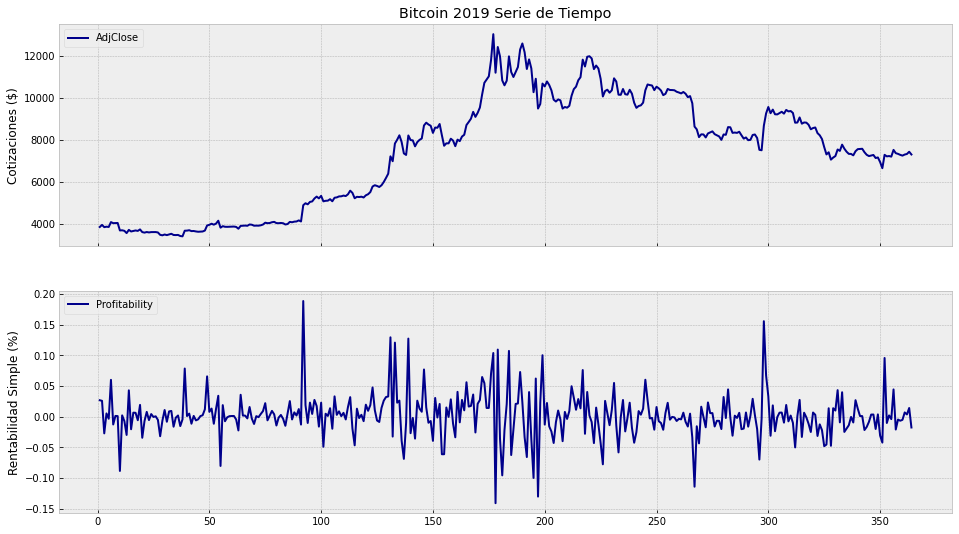

In [15]:
plt.style.use('bmh')
fig, ax = plt.subplots(2, 1, figsize=(16, 9), sharex=True)

df.AdjClose.plot(ax=ax[0], color=['darkblue'])
ax[0].set(title = 'Bitcoin 2019 Serie de Tiempo', ylabel = 'Cotizaciones ($)')
ax[0].legend(loc='upper left')
   
df.Profitability.plot(ax=ax[1], color=['darkblue'])
ax[1].set(ylabel = 'Rentabilidad Simple (%)')
ax[1].legend(loc='upper left')

In [16]:
import seaborn as sb

In [17]:
print(df.groupby('Day').size())

Day
Friday       52
Monday       52
Saturday     52
Sunday       52
Thursday     52
Tuesday      52
Wednesday    52
dtype: int64


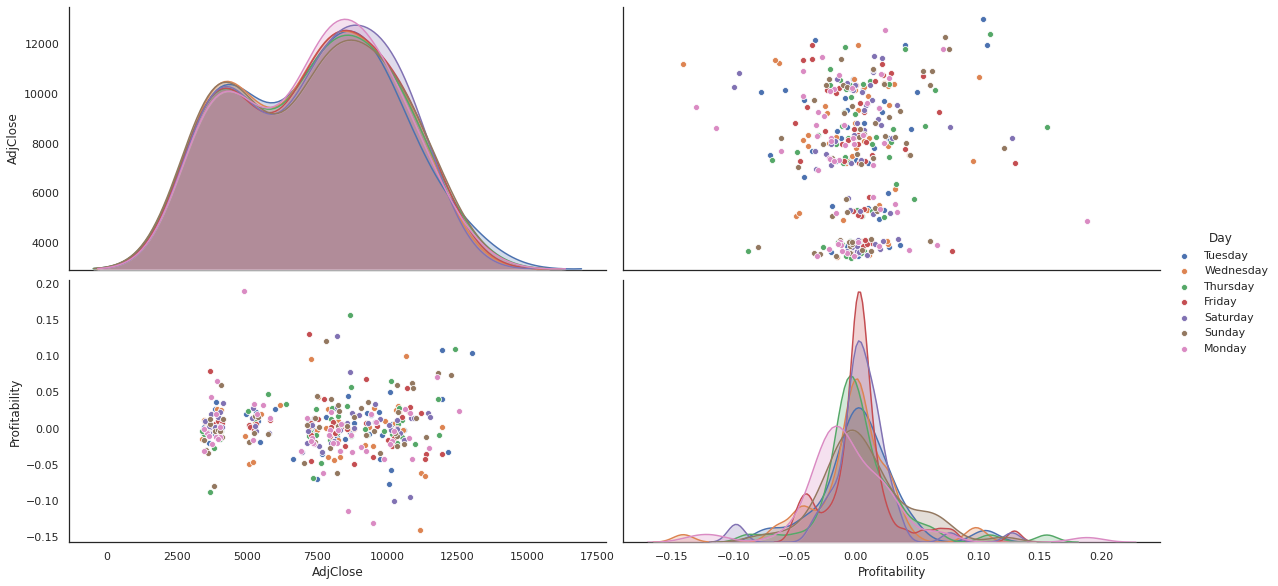

In [18]:
sb.set(style="white")
sb.pairplot(df, hue='Day', height=4, aspect=2, vars=["AdjClose","Profitability"])

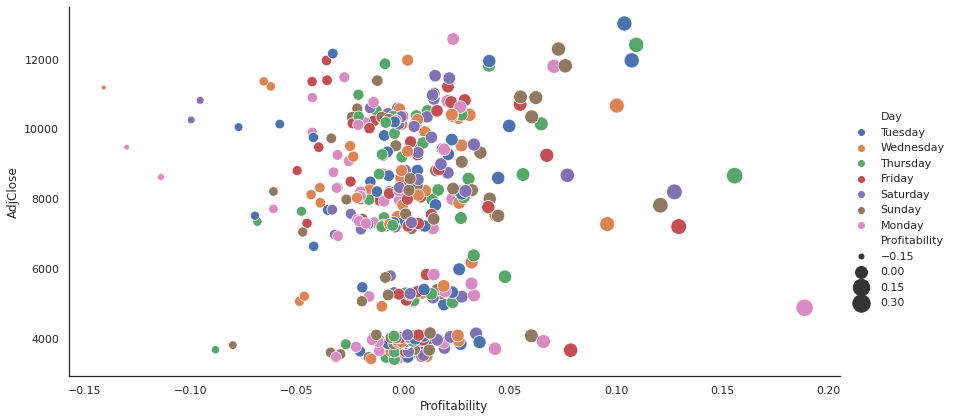

In [19]:
sb.set(style="white")
sb.relplot(x="Profitability", y="AdjClose", hue='Day', kind="scatter", size="Profitability", 
           sizes=(25,300), height=6, aspect=2, data=df)

## **Modelo de volatilidad**



Se toma en cuenta  la heterocedasticidad condicional, que es un fenómeno causado cuando un aumento en la volatilidad se correlaciona con un aumento adicional en la volatilidad. 

Por ejemplo: imaginamos que el precio del bitcoin baja significativamente debido a algunas noticias de última hora relacionadas con las criptodivisas. Una caída del precio tan repentina podría desencadenar en ventas de bitcoin, y esas ventas podrían hacer que el precio cayera aún más.

La volatilidad es un concepto increíblemente importante en  finanzas. Es sinónimo de riesgo y tiene muchas aplicaciones en finanzas cuantitativas. 
+ En primer lugar, se utiliza en el precio de opciones, ya que el modelo Black-Scholes se basa en la volatilidad del activo subyacente. 
+ En segundo lugar, la volatilidad tiene un impacto significativo en la gestión de riesgos, donde se utiliza para calcular métricas.
+ En tercer lugar, la volatilidad también está presente en el comercio, ya que se puede negociar directamente en forma del índice de volatilidad CBOE (símbolo de cotización: VIX). El nombre proviene del  Chicago Board Options Exchange, mediante el cual el índice se calcula en tiempo real.

In [20]:
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.diagnostic import acorr_ljungbox

### **Explicando la volatilidad de la rentabilidad del Bitcoin con modelos ARCH**

En este punto, se tratará  de explicar la volatilidad condicional de los retornos del Bitcoin, con el modelo de Heterocedasticidad Condicional Autorregresiva (ARCH).

In [21]:
pip install arch

In [22]:
import pandas as pd
from arch import arch_model

In [23]:
modelo_ARCH = arch_model(df['Profitability'], mean='Zero', vol='ARCH', p=1, o=0, q=0)

In [24]:
modelo_AJUSTADO_ARCH = modelo_ARCH.fit(disp='off')
print(modelo_AJUSTADO_ARCH.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          Profitability   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                       ARCH   Log-Likelihood:                703.264
Distribution:                  Normal   AIC:                          -1402.53
Method:            Maximum Likelihood   BIC:                          -1394.73
                                        No. Observations:                  364
Date:                Fri, Aug 21 2020   Df Residuals:                      362
Time:                        06:44:28   Df Model:                            2
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.0023e-03  2.439e-04      4.110  3.952e-05 [5.

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001284. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


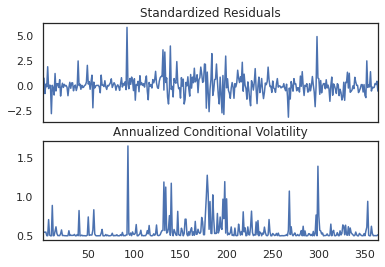

In [25]:
GraficoARCH = modelo_AJUSTADO_ARCH.plot(annualize='D')

Se puede observar que algunos residuos estandarizados  son grandes (en magnitud) y corresponden a periodos altamente volátiles.



### **Explicando la volatilidad de la rentabilidad del Bitcoin con modelos GARCH**


In [26]:
modelo_GARCH = arch_model(df['Profitability'], mean='Zero', vol='GARCH', p=1, o=0, q=1)

In [27]:
modelo_AJUSTADO_GARCH = modelo_GARCH.fit(disp='off')
print(modelo_AJUSTADO_GARCH.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          Profitability   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                      GARCH   Log-Likelihood:                714.675
Distribution:                  Normal   AIC:                          -1423.35
Method:            Maximum Likelihood   BIC:                          -1411.66
                                        No. Observations:                  364
Date:                Fri, Aug 21 2020   Df Residuals:                      361
Time:                        06:44:29   Df Model:                            3
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      3.6784e-04  1.830e-04      2.010  4.440e-02 [9.

/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:293: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.001284. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


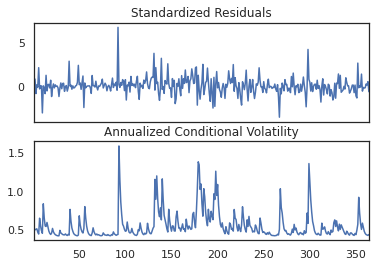

In [28]:
GraficoGARCH = modelo_AJUSTADO_GARCH.plot(annualize='D')

Cuando se usa ARCH, la serie de volatilidad condicional muestra muchos picos y luego regresa inmediatamente al nivel bajo. 

En el modelo GARCH, dado que el modelo también incluye volatilidad condicional, se necesita más tiempo para volver al nivel observado antes del pico.

## **Perceptrones multicapa para el pronóstico de series de tiempo.**

In [29]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

from keras.layers import Input, Embedding, Dense, Flatten, Dropout, concatenate, LSTM
from keras.layers import BatchNormalization, SpatialDropout1D
from keras.callbacks import Callback
from keras.models import Model
from keras.optimizers import Adam

In [30]:
df.head()

,Date,Day,DayNum,Month,MonthNum,High,Low,Open,Close,Volume,AdjClose,Profitability
1,2019-01-01,Tuesday,1,January,1,3850.913818,3707.231201,3746.713379,3843.520020,4324200990,3843.520020,0.026938
2,2019-01-02,Wednesday,2,January,1,3947.981201,3817.409424,3849.216309,3943.409424,5244856835,3943.409424,0.025989
3,2019-01-03,Thursday,3,January,1,3935.685059,3826.222900,3931.048584,3836.741211,4530215218,3836.741211,-0.027050
4,2019-01-04,Friday,4,January,1,3865.934570,3783.853760,3832.040039,3857.717529,4847965467,3857.717529,0.005467
5,2019-01-05,Saturday,5,January,1,3904.903076,3836.900146,3851.973877,3845.194580,5137609823,3845.194580,-0.003246


In [31]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [32]:
df.columns

Index(['Date', 'Day', 'DayNum', 'Month', 'MonthNum', 'High', 'Low', 'Open',
       'Close', 'Volume', 'AdjClose', 'Profitability'],
      dtype='object')

In [33]:
# load dataset
values = df['AdjClose'].values

# ensure all data is float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.reset_index(inplace=True, drop=True)
reframed.head()

contador=0


reframed['DayNum']=df['DayNum']
reframed['MonthNum']=df['MonthNum']

for i in range(reframed.index[0],reframed.index[-1]):
    reframed['DayNum'].loc[contador]=df['DayNum'][i+8]
    reframed['MonthNum'].loc[contador]=df['MonthNum'][i+8]
    contador=contador+1
reframed.head()


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t),DayNum,MonthNum
0,-0.907651,-0.886877,-0.909061,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,1.0,1.0
1,-0.886877,-0.909061,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,2.0,1.0
2,-0.909061,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,-0.941882,3.0,1.0
3,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,-0.941882,-0.940127,4.0,1.0
4,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,-0.941882,-0.940127,-0.945547,5.0,1.0


In [34]:
reordenado=reframed[ ['DayNum','MonthNum','var1(t-7)','var1(t-6)','var1(t-5)','var1(t-4)','var1(t-3)','var1(t-2)','var1(t-1)','var1(t)'] ]
reordenado.dropna(inplace=True)
reordenado

,DayNum,MonthNum,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
0,1.0,1.0,-0.907651,-0.886877,-0.909061,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693
1,2.0,1.0,-0.886877,-0.909061,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767
2,3.0,1.0,-0.909061,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,-0.941882
3,4.0,1.0,-0.904699,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,-0.941882,-0.940127
4,5.0,1.0,-0.907303,-0.859171,-0.869857,-0.868693,-0.867767,-0.941882,-0.940127,-0.945547
...,...,...,...,...,...,...,...,...,...,...
352,3.0,12.0,-0.209012,-0.205690,-0.211442,-0.144802,-0.177237,-0.184120,-0.193973,-0.201499
353,4.0,12.0,-0.205690,-0.211442,-0.144802,-0.177237,-0.184120,-0.193973,-0.201499,-0.190868
354,5.0,12.0,-0.211442,-0.144802,-0.177237,-0.184120,-0.193973,-0.201499,-0.190868,-0.185065
355,6.0,12.0,-0.144802,-0.177237,-0.184120,-0.193973,-0.201499,-0.190868,-0.185065,-0.163298


### Dividimos en datos de entrenamiento y datos de validación


In [46]:
training_data = reordenado.drop('var1(t)',axis=1)#.values
target_data=reordenado['var1(t)']
#training_data.head()
valid_data = training_data[364-28:364]
valid_target=target_data[364-28:364]

training_data = training_data[1:364]
target_data=target_data[1:364]
print(training_data.shape,target_data.shape,valid_data.shape,valid_target.shape)
#training_data.head()


(356, 9) (356,) (21, 9) (21,)


### Creando la red neuronal
Red Feedforward con Embeddings.
9 columnas (2 embeddings y 7 pasos).



In [36]:
def crear_modeloEmbeddings():
    emb_dias = 2 #tamanio profundidad de embeddings
    emb_meses = 4

    in_dias = Input(shape=[1], name = 'dias')
    emb_dias = Embedding(7+1, emb_dias)(in_dias)
    in_meses = Input(shape=[1], name = 'meses')
    emb_meses = Embedding(12+1, emb_meses)(in_meses)

    in_cli = Input(shape=[PASOS], name = 'cli')

    fe = concatenate([(emb_dias), (emb_meses)])

    x = Flatten()(fe)
    x = Dense(PASOS,activation='tanh')(x)
    outp = Dense(1,activation='tanh')(x)
    model = Model(inputs=[in_dias,in_meses,in_cli], outputs=outp)

    model.compile(loss='mean_absolute_error', 
                  optimizer='adam',
                  metrics=['MSE'])

    model.summary()
    return model

In [37]:
EPOCHS=40

model = crear_modeloEmbeddings()

continuas=training_data[['var1(t-7)','var1(t-6)','var1(t-5)','var1(t-4)','var1(t-3)','var1(t-2)','var1(t-1)']]
valid_continuas=valid_data[['var1(t-7)','var1(t-6)','var1(t-5)','var1(t-4)','var1(t-3)','var1(t-2)','var1(t-1)']]

history=model.fit([training_data['DayNum'],training_data['MonthNum'],continuas], target_data, epochs=EPOCHS
                 ,validation_data=([valid_data['DayNum'],valid_data['MonthNum'],valid_continuas],valid_target))


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
dias (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
meses (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 2)         16          dias[0][0]                       
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 4)         52          meses[0][0]                      
_______________________________________________________________________________________

In [38]:
results=model.predict([valid_data['DayNum'],valid_data['MonthNum'],valid_continuas])
print( len(results) )


21


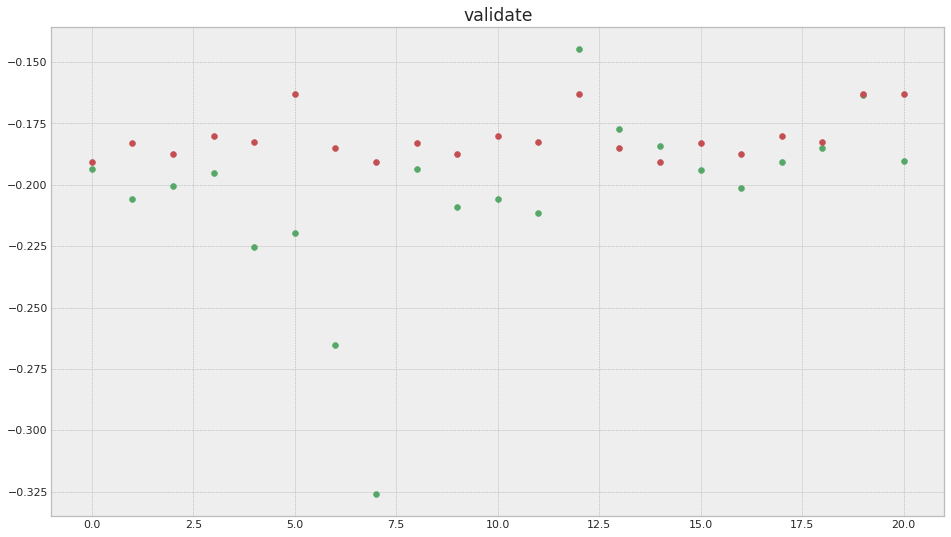

In [39]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 9))

plt.scatter(range(len(valid_target)),valid_target,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

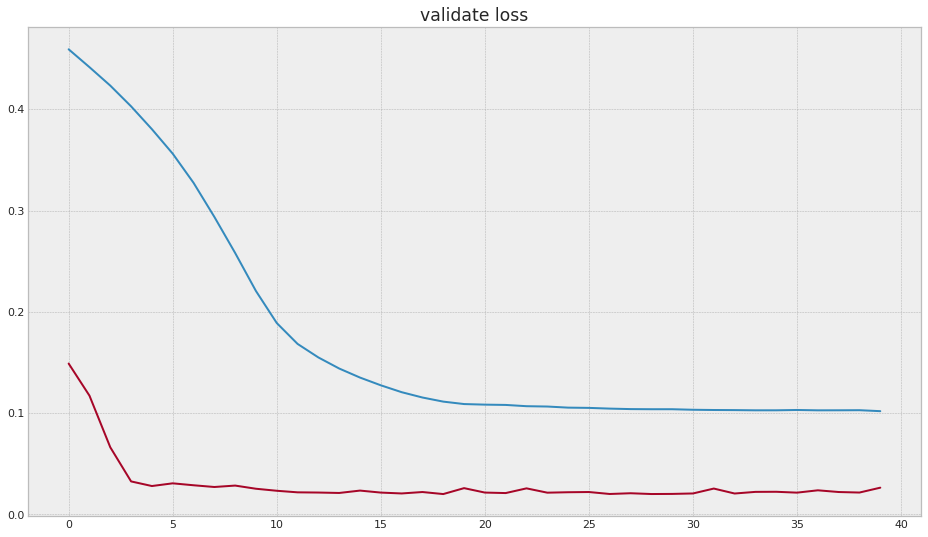

In [40]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(history.history['loss'])
plt.title('loss')
plt.plot(history.history['val_loss'])
plt.title('validate loss')
plt.show()

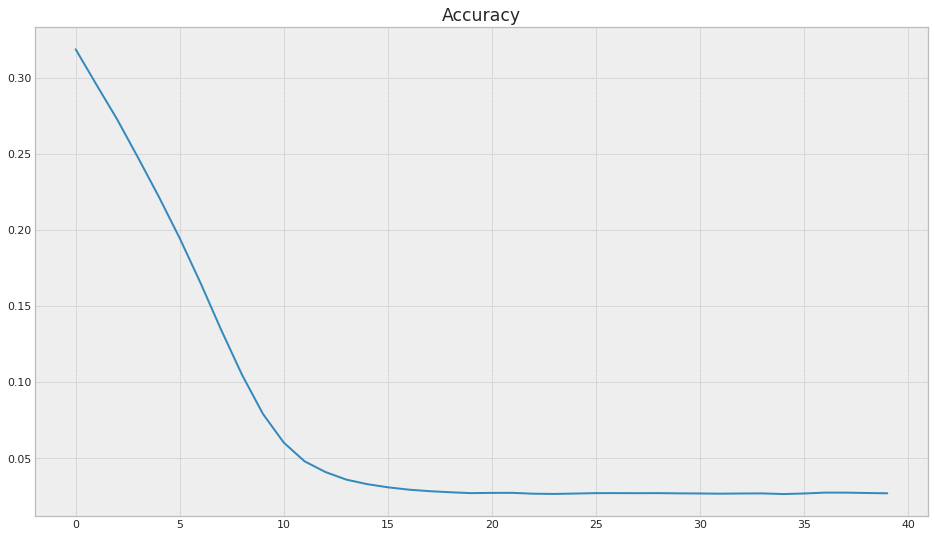

In [41]:
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(16, 9))

plt.title('Accuracy')
plt.plot(history.history['MSE'])
plt.show()

### Predicción

In [53]:
compara = pd.DataFrame(np.array([valid_target, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']

inverted = scaler.inverse_transform(compara.values)

compara = pd.DataFrame(inverted)
compara.columns = ['real', 'prediccion']
compara['diferencia'] = compara['real'] - compara['prediccion']
compara.tail()


,real,prediccion,diferencia
16,7238.966309,7306.449707,-67.483398
17,7290.088379,7341.755859,-51.667480
18,7317.990234,7330.993652,-13.003418
19,7422.652832,7424.629883,-1.977051
20,7292.995117,7424.629883,-131.634766


In [59]:
df.tail(21)

,Date,Day,DayNum,Month,MonthNum,High,Low,Open,Close,Volume,AdjClose,Profitability
344,2019-12-10,Tuesday,1,December,12,7424.022949,7246.043945,7397.134277,7278.119629,18249031194,7278.119629,-0.016590
345,2019-12-11,Wednesday,2,December,12,7324.156250,7195.527344,7277.197754,7217.427246,16350490689,7217.427246,-0.008339
346,2019-12-12,Thursday,3,December,12,7266.639648,7164.741211,7216.738770,7243.134277,18927080224,7243.134277,0.003562
347,2019-12-13,Friday,4,December,12,7293.560547,7227.122559,7244.662109,7269.684570,17125736940,7269.684570,0.003666
348,2019-12-14,Saturday,5,December,12,7308.836426,7097.208984,7268.902832,7124.673828,17137029729,7124.673828,-0.019947
349,2019-12-15,Sunday,6,December,12,7181.075684,6924.375977,7124.239746,7152.301758,16881129804,7152.301758,0.003878
350,2019-12-16,Monday,0,December,12,7171.168945,6903.682617,7153.663086,6932.480469,20213265949,6932.480469,-0.030734
351,2019-12-17,Tuesday,1,December,12,6964.075195,6587.974121,6931.315430,6640.515137,22363804217,6640.515137,-0.042116
352,2019-12-18,Wednesday,2,December,12,7324.984863,6540.049316,6647.698242,7276.802734,31836522778,7276.802734,0.095819
353,2019-12-19,Thursday,3,December,12,7346.602539,7041.381836,7277.590820,7202.844238,25904604415,7202.844238,-0.010164


In [72]:
real = df[343:364]
real.reset_index(inplace=True, drop=True)

In [73]:
real['Prediccion']=compara['prediccion']
real['Real']=compara['real']
real.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Day,DayNum,Month,MonthNum,High,Low,Open,Close,Volume,AdjClose,Profitability,Prediccion,Real
16,2019-12-26,Thursday,3,December,12,7388.302734,7200.386719,7274.799316,7238.966797,22787010034,7238.966797,-0.004974,7306.449707,7238.966309
17,2019-12-27,Friday,4,December,12,7363.529297,7189.934082,7238.141113,7290.088379,22777360995,7290.088379,0.007062,7341.755859,7290.088379
18,2019-12-28,Saturday,5,December,12,7399.041016,7286.905273,7289.031250,7317.990234,21365673026,7317.990234,0.003827,7330.993652,7317.990234
19,2019-12-29,Sunday,6,December,12,7513.948242,7279.865234,7317.647461,7422.652832,22445257701,7422.652832,0.014302,7424.629883,7422.652832
20,2019-12-30,Monday,0,December,12,7454.824219,7276.308105,7420.272949,7292.995117,22874131671,7292.995117,-0.017468,7424.629883,7292.995117


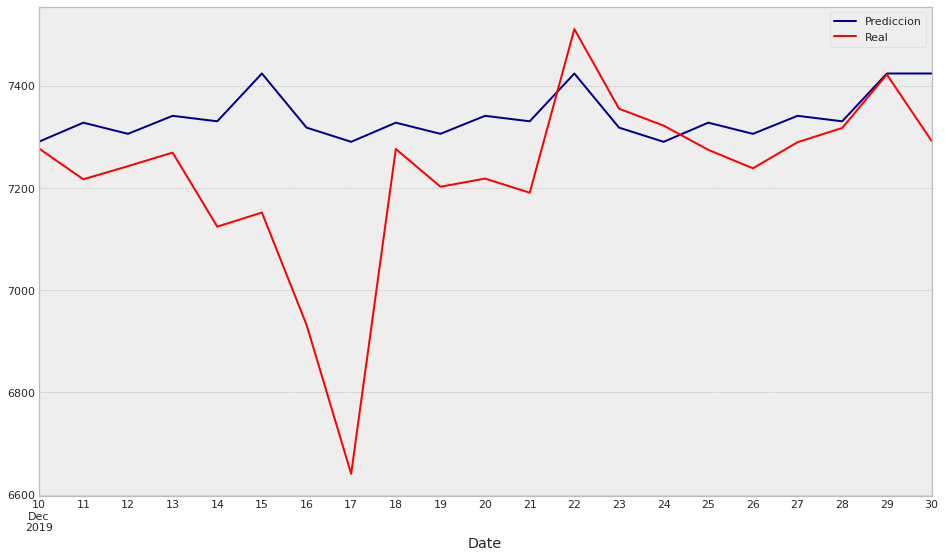

In [75]:
plt.style.use('bmh')
real.plot('Date',['Prediccion','Real'], kind='line', figsize=(16,9), color=['darkblue','red'])